<a href="https://colab.research.google.com/github/erivetna87/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module3-databackedassertions/LS_DS7_113_Making_Data_backed_Assertions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - Making Data-backed Assertions

This is, for many, the main point of data science - to create and support reasoned arguments based on evidence. It's not a topic to master in a day, but it is worth some focused time thinking about and structuring your approach to it.

## Y Variable:
 - Thing we want to predict
 - "label"
 - "target"
 - "dependent variable"
 - "predicted variable"

## X Variable:
 - The thing that *explains* the y variable
 - "predictor"
 - "explanatory variable"
 - "independent variable"
 - "feature"

## Lecture - generating a confounding variable

The prewatch material told a story about a hypothetical health condition where both the drug usage and overall health outcome were related to gender - thus making gender a confounding variable, obfuscating the possible relationship between the drug and the outcome.

Let's use Python to generate data that actually behaves in this fashion!

In [0]:
import random
dir(random)  # Shows functions/classes of a package. Underlying "unintended access" is denoted by beginning with an underscore

['BPF',
 'LOG4',
 'NV_MAGICCONST',
 'RECIP_BPF',
 'Random',
 'SG_MAGICCONST',
 'SystemRandom',
 'TWOPI',
 '_BuiltinMethodType',
 '_MethodType',
 '_Sequence',
 '_Set',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_acos',
 '_bisect',
 '_ceil',
 '_cos',
 '_e',
 '_exp',
 '_inst',
 '_itertools',
 '_log',
 '_pi',
 '_random',
 '_sha512',
 '_sin',
 '_sqrt',
 '_test',
 '_test_generator',
 '_urandom',
 '_warn',
 'betavariate',
 'choice',
 'choices',
 'expovariate',
 'gammavariate',
 'gauss',
 'getrandbits',
 'getstate',
 'lognormvariate',
 'normalvariate',
 'paretovariate',
 'randint',
 'random',
 'randrange',
 'sample',
 'seed',
 'setstate',
 'shuffle',
 'triangular',
 'uniform',
 'vonmisesvariate',
 'weibullvariate']

In [0]:
# Let's think of another scenario:
# We work for a company that sells accessories for mobile phones.
# They have an ecommerce site, and we are supposed to analyze logs
# to determine what sort of usage is related to purchases, and thus guide
# website development to encourage higher conversion.

# The hypothesis - users who spend longer on the site tend
# to spend more. Seems reasonable, no?

# But there's a confounding variable! If they're on a phone, they:
# a) Spend less time on the site, but
# b) Are more likely to be interested in the actual products!

# Let's use namedtuple to represent our data

# A variable:
my_var = 5
# A tuple
my_tuple = (5,10)

# Named Tuples - Great for creating Dataframes with Pandas
from collections import namedtuple
# purchased and mobile are bools, time_on_site in seconds
User = namedtuple('User', ['purchased','time_on_site', 'mobile'])  

example_user = User(False, 12, False)
print(example_user)

User(purchased=False, time_on_site=12, mobile=False)


In [0]:
#Juypter/Collab will only return the output of the last line of code. 
random.random()
random.random()
random.random()
random.random()
random.random()
random.random()

In [0]:
# And now let's generate 1000 example users
# 750 mobile, 250 not (i.e. desktop)
# A desktop user has a base conversion likelihood of 10%
# And it goes up by 1% for each 15 seconds they spend on the site
# And they spend anywhere from 10 seconds to 10 minutes on the site (uniform)
# Mobile users spend on average half as much time on the site as desktop
# But have three times as much base likelihood of buying something

users = []

# Sets random seed for reproducibility
random.seed(42)

for _ in range(250):
  # Desktop users
  time_on_site = random.uniform(10, 600)
  purchased = random.random() < 0.1 + (time_on_site / 1500)
  users.append(User(purchased, time_on_site, False))
  
for _ in range(750):
  # Mobile users
  time_on_site = random.uniform(5, 300)
  purchased = random.random() < 0.3 + (time_on_site / 1500)
  users.append(User(purchased, time_on_site, True))
  
random.shuffle(users)
print(users[:10])

[User(purchased=False, time_on_site=150.42273427770718, mobile=False), User(purchased=True, time_on_site=284.06235530493245, mobile=True), User(purchased=True, time_on_site=140.37976895454653, mobile=True), User(purchased=True, time_on_site=49.206452507812216, mobile=True), User(purchased=False, time_on_site=167.81563803588924, mobile=True), User(purchased=False, time_on_site=20.484876517641524, mobile=True), User(purchased=False, time_on_site=167.3540069049869, mobile=True), User(purchased=False, time_on_site=447.75054592529114, mobile=False), User(purchased=True, time_on_site=57.93525538719398, mobile=True), User(purchased=True, time_on_site=292.6494305470663, mobile=True)]


In [0]:
# Let's put this in a dataframe so we can look at it more easily
import pandas as pd
user_data = pd.DataFrame(users)
print(user_data.shape)
user_data.head()

(1000, 3)


,purchased,time_on_site,mobile
0,False,150.422734,False
1,True,284.062355,True
2,True,140.379769,True
3,True,49.206453,True
4,False,167.815638,True


In [0]:
# You can comment out lots of lines at once by using ctrl/cmd + /
# print(random.random())
# print(random.random())
# print(random.random())
# print(random.random())
# print(random.random())

# Lists are "mutable" - can be altered
my_list = [1,2,3,4,5]

my_list[3] = 10

print(my_list)

# Tuples are "immutable" - cannot be altered
my_tuple = (4,20)

print(my_tuple[0])

# Not Allowed!
# my_tuple[1] = 3

# But you can create new ones based on the old ones
new_tuple = (my_tuple[0], 3)

[1, 2, 3, 10, 5]
4


In [0]:
# Python does not support "strict typing"
my_variable = 5
print(type(my_variable))

my_variable = 'string thingy'
print(type(my_variable))

<class 'int'>
<class 'str'>


In [0]:
# Let's use crosstabulation to try to see what's going on
pd.crosstab(user_data['purchased'], user_data['time_on_site'])

time_on_site,5.789338167851291,5.836487686604824,7.267690340465448,7.280322437947023,7.733814701629437,7.772242279186957,7.994578759409748,8.373541587279558,9.106003254765849,9.38379653305911,9.615509927247123,9.848428900738856,10.23950442139964,10.337418715486669,10.586523414450706,10.718069679753153,10.997854148991385,11.012105109498041,11.706921559980145,12.091956561791557,12.382271645712285,12.75378790843838,12.995103670392169,13.370178930168896,15.920785346944974,16.135510245480567,16.75893133416585,16.773802946263586,16.868343577661772,17.362252869462687,17.479167161023454,17.922851319441314,18.36049180470949,18.567335759777762,19.359514766905985,19.468053978919983,19.833966879145127,20.484876517641524,20.710781715466965,20.814676916297277,...,513.5342908357718,515.4718990593212,517.1848861497105,518.3867964481467,518.4070711833585,520.1173607697788,524.578401914593,526.7532348231344,527.0568996188746,528.0256635303839,528.4459079156787,529.7098624749993,535.2695153363682,535.9412962281579,536.3859449458588,539.3527809076247,540.36553555062,542.6552719822238,543.3178572203369,548.4504252134441,549.5830779469206,561.9534019425959,564.1499127915823,564.814565730808,574.7557126020009,574.8174081072071,577.8952462993177,580.464571388533,581.5385253318037,581.7077917980032,582.5363605031145,582.9362427920347,588.8783154469735,590.65747470592,593.8187768755912,597.1381204299279,597.7116143416571,598.547187832115,599.088120104121,599.5766563635087
purchased,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
False,1,1,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,0,1,1,1,1,0,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,0,...,1,1,0,0,1,1,1,0,0,1,1,1,0,1,0,1,0,1,1,1,0,1,0,1,0,1,0,0,1,1,0,1,1,0,1,1,1,1,1,1
True,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,...,0,0,1,1,0,0,0,1,1,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,1,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0


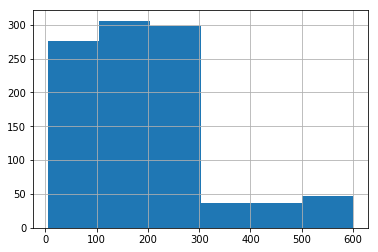

In [0]:
user_data['time_on_site'].hist(bins=6);

In [0]:
# OK, that's not quite what we want
# Time is continuous! We need to put it in discrete buckets
# Pandas calls these bins, and pandas.cut helps make them

time_bins = pd.cut(user_data['time_on_site'], 6)  # 5 equal-sized bins
crosstab = pd.crosstab(user_data['purchased'], time_bins)
print(type(crosstab))
crosstab

<class 'pandas.core.frame.DataFrame'>


time_on_site,"(5.196, 104.754]","(104.754, 203.718]","(203.718, 302.683]","(302.683, 401.648]","(401.648, 500.612]","(500.612, 599.577]"
purchased,,,,,,
False,188,210,164,23,21,30
True,88,96,134,13,16,17


## Revert to Pandas 0.23.4 to avoid crosstab bugs

In [0]:
print(pd.__version__)

0.23.4


In [0]:
!pip freeze

In [0]:
!pip install pandas==0.23.4

In [0]:
# We can make this a bit clearer by normalizing (getting %)
pd.crosstab(user_data['purchased'], time_bins, normalize='columns')

time_on_site,"(5.196, 104.754]","(104.754, 203.718]","(203.718, 302.683]","(302.683, 401.648]","(401.648, 500.612]","(500.612, 599.577]"
purchased,,,,,,
False,0.681159,0.686275,0.550336,0.638889,0.567568,0.638298
True,0.318841,0.313725,0.449664,0.361111,0.432432,0.361702


In [0]:
# That seems counter to our hypothesis
# More time on the site can actually have fewer purchases

# But we know why, since we generated the data!
# Let's look at mobile and purchased
pd.crosstab(user_data['purchased'], user_data['mobile'], normalize='columns')

mobile,False,True
purchased,,
False,0.704,0.613333
True,0.296,0.386667


In [0]:
# Yep, mobile users are more likely to buy things
# But we're still not seeing the *whole* story until we look at all 3 at once

# Live/stretch goal - how can we do that?

In [0]:
pd.crosstab(user_data['purchased'], [time_bins, user_data['mobile']],)

time_on_site (5.196, 104.754]        ...         (500.612, 599.577]
mobile                  False        ...                      False
purchased                            ...                           
False                      33        ...                         30
True                        4        ...                         17

[2 rows x 9 columns]

In [0]:
crosstab = pd.crosstab(time_bins, [user_data['purchased'], user_data['mobile']], normalize='columns')

purchased              False               True           
mobile                 False     True      False     True 
time_on_site                                              
(5.196, 104.754]    0.187500  0.336957  0.054054  0.289655
(104.754, 203.718]  0.227273  0.369565  0.081081  0.310345
(203.718, 302.683]  0.164773  0.293478  0.243243  0.400000
(302.683, 401.648]  0.130682  0.000000  0.175676  0.000000
(401.648, 500.612]  0.119318  0.000000  0.216216  0.000000
(500.612, 599.577]  0.170455  0.000000  0.229730  0.000000

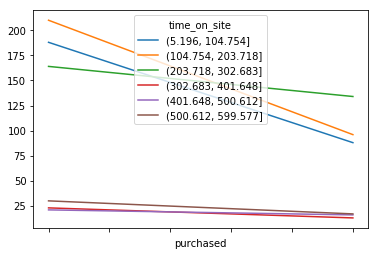

In [0]:
crosstab.plot();

In [0]:
ct = pd.crosstab(time_bins, [user_data['purchased'], user_data['mobile']],
                 normalize='columns')
ct

purchased              False               True           
mobile                 False     True      False     True 
time_on_site                                              
(5.196, 104.754]    0.187500  0.336957  0.054054  0.289655
(104.754, 203.718]  0.227273  0.369565  0.081081  0.310345
(203.718, 302.683]  0.164773  0.293478  0.243243  0.400000
(302.683, 401.648]  0.130682  0.000000  0.175676  0.000000
(401.648, 500.612]  0.119318  0.000000  0.216216  0.000000
(500.612, 599.577]  0.170455  0.000000  0.229730  0.000000

In [0]:
ct_final = ct.iloc[:, [2,3]]
ct_final

purchased               True          
mobile                 False     True 
time_on_site                          
(5.196, 104.754]    0.054054  0.289655
(104.754, 203.718]  0.081081  0.310345
(203.718, 302.683]  0.243243  0.400000
(302.683, 401.648]  0.175676  0.000000
(401.648, 500.612]  0.216216  0.000000
(500.612, 599.577]  0.229730  0.000000

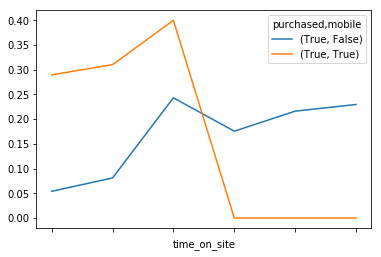

In [0]:
ct_final.plot();

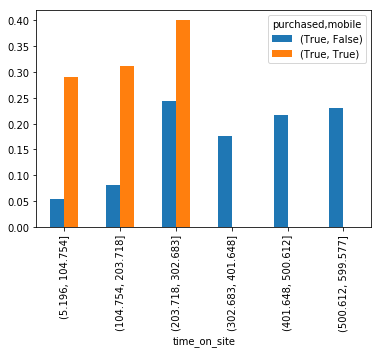

In [0]:
ct_final.plot(kind='bar');

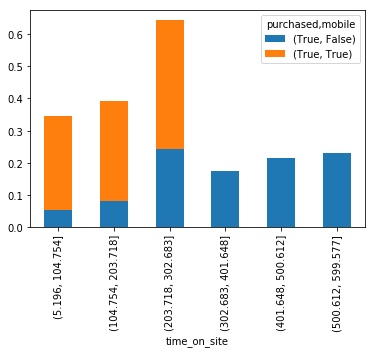

In [0]:
ct_final.plot(kind='bar', stacked=True);

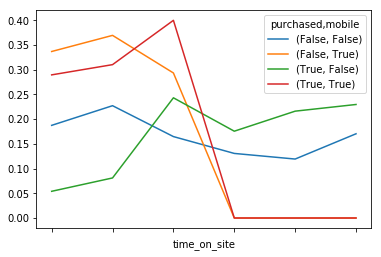

In [0]:
ct.plot();

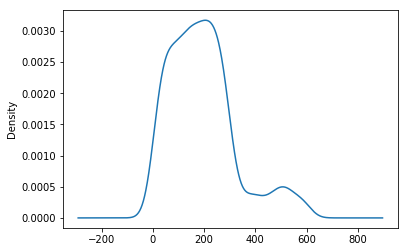

In [0]:
user_data['time_on_site'].plot.density();

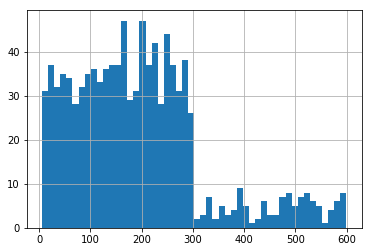

In [0]:
user_data['time_on_site'].hist(bins=50);

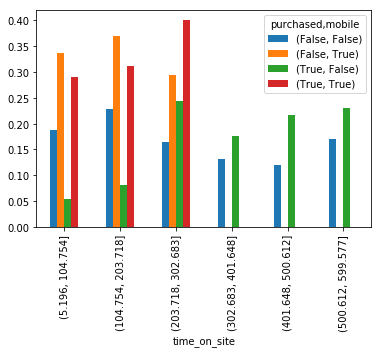

In [0]:
ct.plot(kind='bar')

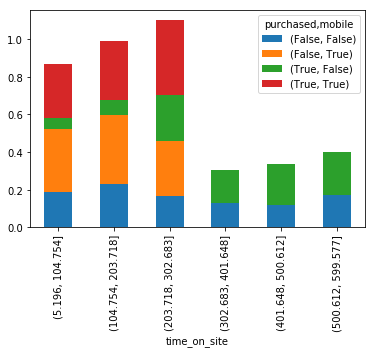

In [0]:
ct.plot(kind='bar', stacked=True);

In [0]:
pt = pd.pivot_table(user_data, values='purchased', index=time_bins)
pt

,purchased
time_on_site,
"(5.196, 104.754]",0.318841
"(104.754, 203.718]",0.313725
"(203.718, 302.683]",0.449664
"(302.683, 401.648]",0.361111
"(401.648, 500.612]",0.432432
"(500.612, 599.577]",0.361702


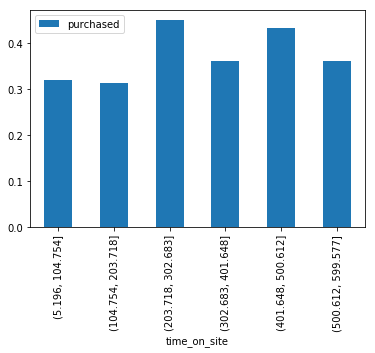

In [0]:
pt.plot.bar()